# Customer Attrition - Introduction and Data Exploration

For this project, we will find a way to determine whether a customer of a bank's credit card services will quit being a customer given their characteristics. We will introduce the problem and start exploring our data in this notebook. Below, we import the necessary Python libraries and set the NumPy random seed so that our results will be deterministic.

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(42)

In the code block below, we read in and display the dataset we will be using. The dataset can be found here: https://www.kaggle.com/sakshigoyal7/credit-card-customers?select=BankChurners.csv

In [2]:
pd.set_option('display.max_columns', 100)

all_data = pd.read_csv('Datasets/BankChurners.csv')

display(all_data.head())
print(all_data.shape)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


(10127, 23)


As shown above, our dataset has 10,127 rows and 23 columns. Each row corresponds to a customer. The descriptions of the columns are below:

**CLIENTNUM:** The ID of the customer<br>
**Attrition_Flag:** Whether the customer quit or not<br>
**Customer_Age:** The age of the customer in years<br>
**Gender:** The gender of the customer<br>
**Dependent_count:** The number of family members dependent on the customer<br>
**Education_Level:** How educated the customer is (Uneducated, High School Diploma, Some College, College Graduate, Post Graduate Degree, Doctorate)<br>
**Marital_Status:** The marital status of the customer (Single, Married, Divorced, Unknown)<br>
**Income_Category:** The income bracket of the customer (< \\$40K, \\$40K - \\$60K, \\$60K - \\$80K, \\$80K - \\$120K, > \\$120K)<br>
**Card_Category:** The customer's credit card plan (Blue, Silver, Gold, Platinum)<br>
**Months_on_book:** How long the customer has been with the bank in months<br>
**Total_Relationship_Count:** The number of accounts the customer has with the bank<br>
**Months_Inactive_12_mon:** The number of months where the customer has not made a single transaction over the past 12 months<br>
**Contacts_Count_12_mon:** The number of times the customer has contacted the bank over the past 12 months<br>
**Credit_Limit:** The customer's credit limit<br>
**Total_Revolving_Bal:** The average revolving balance of the customer's credit card account over the past 12 months (this one's a misnomer)<br>
**Avg_Open_To_Buy:** The average Open-to-Buy amount on the customer's credit card account over the past 12 months<br>
**Total_Amt_Chng_Q4_Q1:** The change in the amount in transactions made by the customer between the last quarter of the previous year and the first quarter of the current year, expressed as Q4 / Q1<br>
**Total_Trans_Amt:** The total amount in transactions made by the customer over the past 12 months<br>
**Total_Trans_Ct:** The total number of transactions made by the customer over the past 12 months<br>
**Total_Ct_Chng_Q4_Q1:** The change in the number of transactions made by the customer between the last quarter of the previous year and the first quarter of the current year, expressed as Q4 / Q1<br>
**Avg_Utilization_Ratio:** The average utilization ratio of the customer's credit card account over the past 12 months

The last two columns seem to be results of a predictive model, so they should be dropped. Also, `Total_Revolving_Bal` should be renamed to `Avg_Revolving_Bal`. Furthermore, since the customer ID is unique for each customer and carries no meaning, it is better to use it as the index of the dataset. We take all actions in the code block below.

In [3]:
all_data.set_index('CLIENTNUM', inplace = True)
all_data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1, inplace = True)
all_data.rename(columns = {'Total_Revolving_Bal': 'Avg_Revolving_Bal'}, inplace = True)
all_data['Attrition_Flag'].replace(['Existing Customer', 'Attrited Customer'], ['Continuing', 'Leaving'], inplace = True)

Below, we randomly split our dataset into a training set and a test set, then display the two sets.

In [4]:
trainX, testX, trainY, testY = train_test_split(all_data.drop('Attrition_Flag', axis = 1), all_data['Attrition_Flag'], test_size = 0.6)

display(trainX.head())
print(trainX.shape)
display(testX.head())
print(testX.shape)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Avg_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,
717050883,60,F,1,High School,Single,Less than $40K,Blue,36,5,2,2,2688.0,1617,1071.0,0.552,4183,71,0.614,0.602
708723858,48,F,4,Graduate,Single,Less than $40K,Blue,37,1,1,3,3413.0,1715,1698.0,0.812,3843,67,0.634,0.502
778929783,40,M,3,Graduate,Divorced,$80K - $120K,Blue,22,2,2,3,1925.0,0,1925.0,0.672,781,28,0.750,0.000
712524858,34,M,1,Graduate,Single,Less than $40K,Blue,28,1,6,3,2669.0,1649,1020.0,0.630,4314,74,0.609,0.618
716620458,32,M,1,High School,Single,Less than $40K,Blue,23,3,2,3,4500.0,0,4500.0,0.626,2439,63,0.703,0.000


(4050, 19)


,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Avg_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,
719455083,48,F,3,Uneducated,Single,Less than $40K,Blue,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504
773503308,59,M,1,Uneducated,Single,Less than $40K,Blue,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716
715452408,37,F,2,Graduate,Divorced,Less than $40K,Blue,36,4,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569
711264033,47,M,3,Doctorate,Divorced,$40K - $60K,Blue,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317
718943508,42,M,3,Unknown,Single,$80K - $120K,Blue,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584


(6077, 19)


The problem we aim to solve in this project is as follows: A bank that offers credit card services has 6,077 customers in a certain city, which we will call the target city. The manager of this bank is worried about its customers unsubscribing from the credit card services. During the same month last year, of the 4,050 customers in a similar city, a relatively large number of them left. The manager wants to reach out to the customers in the target city to convince them to stay with the services. Instead of reaching out to all of them (which is very impractical), the manager wants to determine the customers that are actually likely to unsubscribe, based on the explanatory features, and only reach out to them. Hopefully, they do not reach out to many people that were not about to leave the credit card services, or fail to reach out to many people that were about to leave.

Before we use predictive modeling to identify customers in the target city that would be likely to quit the credit card services, we need to identify and alleviate problems in our data. First, we check if either the training set or test set has missing values or unreasonable data types.

In [5]:
pd.concat((trainX.dtypes, testX.dtypes, np.sum(trainX.isnull()), np.sum(testX.isnull())), axis = 1)

,0,1,2,3
Customer_Age,int64,int64,0,0
Gender,object,object,0,0
Dependent_count,int64,int64,0,0
Education_Level,object,object,0,0
Marital_Status,object,object,0,0
Income_Category,object,object,0,0
Card_Category,object,object,0,0
Months_on_book,int64,int64,0,0
Total_Relationship_Count,int64,int64,0,0
Months_Inactive_12_mon,int64,int64,0,0


The data types of each column are consistent and reasonable (e.g. `Dependent_count` is an integer, `Credit_Limit` is a floating point number), and there are zero null values in either the training or test set. Next, we look at the summaries of the explanatory variables in both the training set and test set to spot unusual values.

In [6]:
categorical = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
display(trainX[categorical].describe())
display(testX[categorical].describe())
display(trainX.describe())
display(testX.describe())

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,4050,4050,4050,4050,4050
unique,2,7,4,6,4
top,F,Graduate,Married,Less than $40K,Blue
freq,2115,1294,1860,1430,3778


,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,6077,6077,6077,6077,6077
unique,2,7,4,6,4
top,F,Graduate,Married,Less than $40K,Blue
freq,3243,1834,2827,2131,5658


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Avg_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000
mean,46.218272,2.328889,35.964691,3.802963,2.346173,2.449383,8618.206247,1154.463951,7463.742296,0.761754,4465.793827,65.275556,0.711195,0.272648
std,8.002146,1.289040,8.100748,1.559772,1.008321,1.107031,9066.421529,814.035450,9064.651891,0.216239,3459.350086,23.714156,0.234284,0.273622
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,563.000000,12.000000,0.000000,0.000000
25%,41.000000,1.000000,31.250000,3.000000,2.000000,2.000000,2534.250000,284.750000,1352.250000,0.634000,2199.500000,45.000000,0.586000,0.022000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4514.500000,1271.000000,3481.500000,0.739000,3913.500000,67.000000,0.703000,0.173000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11161.500000,1775.000000,10006.500000,0.861750,4729.750000,81.000000,0.814750,0.494750
max,66.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,2.271000,18484.000000,139.000000,3.714000,0.999000


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Avg_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000
mean,46.397729,2.357742,35.904229,3.818990,2.337831,2.459273,8641.115649,1168.378970,7472.736679,0.758732,4362.961494,64.580879,0.712907,0.276390
std,8.026430,1.305422,7.909880,1.550918,1.012222,1.105761,9104.378596,815.640583,9108.737341,0.221172,3354.677827,23.307994,0.240603,0.277075
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,14.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2569.000000,400.000000,1305.000000,0.629000,2133.000000,45.000000,0.579000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4573.000000,1282.000000,3469.000000,0.735000,3890.000000,67.000000,0.700000,0.178000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,10973.000000,1789.000000,9798.000000,0.857000,4748.000000,80.000000,0.821000,0.509000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,17995.000000,131.000000,3.571000,0.994000


Among the numeric attributes, there does not seem to be any unusual values in either the training set or test set. For example, `Customer_Age` is between 26 and 67 in the training set and 26 and 73 in the test set. Some values *should* be unusual, like `Avg_Utilization_Ratio` being as high as 0.99, but these values are nonetheless theoretically possible. Below, we print out all unique values of the categorical attributes to see if there are any unusual values.

In [7]:
for c in categorical:
    print(sorted(trainX[c].unique()))
    print(sorted(testX[c].unique()))

['F', 'M']
['F', 'M']
['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown']
['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown']
['Divorced', 'Married', 'Single', 'Unknown']
['Divorced', 'Married', 'Single', 'Unknown']
['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Unknown']
['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Unknown']
['Blue', 'Gold', 'Platinum', 'Silver']
['Blue', 'Gold', 'Platinum', 'Silver']


None of the categorical attributes have unusual values, but three of the attributes have some unknown values. Below, we find the number of unknown values of the `Education_Level`, `Marital_Status`, and `Income Category` columns in both the training set and the test set.

In [8]:
for w in ['Education_Level', 'Marital_Status', 'Income_Category']:
    print(str(np.sum(trainX[w] == 'Unknown')) + ' unknown values of ' + w + ' in training set')
    print(str(np.sum(testX[w] == 'Unknown')) + ' unknown values of ' + w + ' in test set')

598 unknown values of Education_Level in training set
921 unknown values of Education_Level in test set
285 unknown values of Marital_Status in training set
464 unknown values of Marital_Status in test set
441 unknown values of Income_Category in training set
671 unknown values of Income_Category in test set


Unknown values are not an issue in nominal variables (like marital status) since "Unknown" can simply be treated as another category in such variables. However, they do pose problems in ordinal variables (like education level and income category), so we would need to impute missing values. It is reasonable to assume that income is correlated with education level since a more advanced degree helps people qualify for higher paying jobs, and we can use this correlation to impute missing values in the `Income_Category` column, but we should first verify that income is indeed correlated with education level.

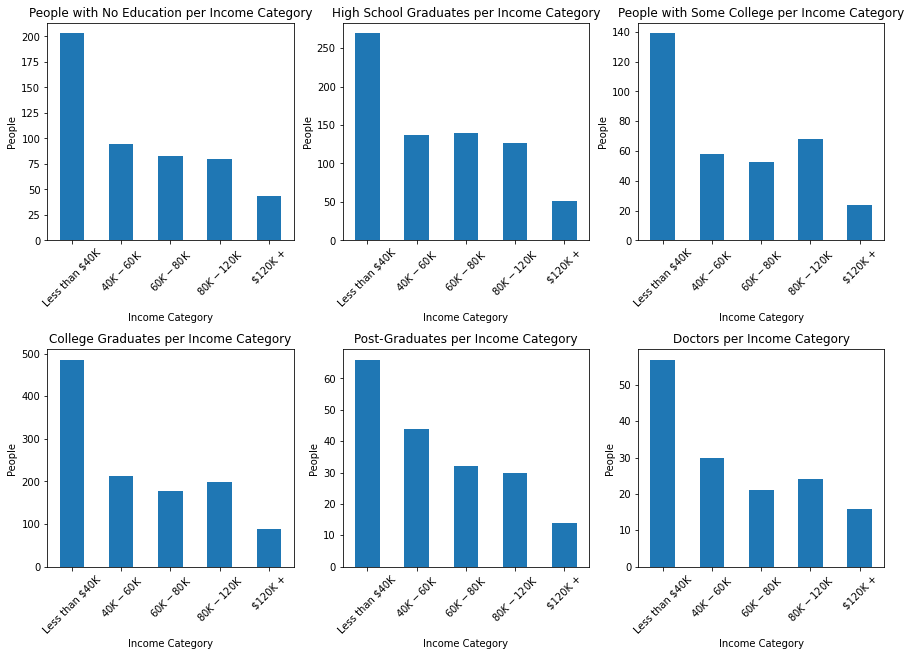

In [9]:
fig = plt.figure(figsize = (15, 10))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

fig.subplots_adjust(hspace = 0.5)
order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

trainX[trainX['Education_Level'] == 'Uneducated']['Income_Category'].value_counts().loc[order].plot(kind = 'bar', ax = ax1)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation = 45)
ax1.set_xlabel('Income Category')
ax1.set_ylabel('People')
ax1.set_title('People with No Education per Income Category')

trainX[trainX['Education_Level'] == 'High School']['Income_Category'].value_counts().loc[order].plot(kind = 'bar', ax = ax2)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation = 45)
ax2.set_xlabel('Income Category')
ax2.set_ylabel('People')
ax2.set_title('High School Graduates per Income Category')

trainX[trainX['Education_Level'] == 'College']['Income_Category'].value_counts().loc[order].plot(kind = 'bar', ax = ax3)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation = 45)
ax3.set_xlabel('Income Category')
ax3.set_ylabel('People')
ax3.set_title('People with Some College per Income Category')

trainX[trainX['Education_Level'] == 'Graduate']['Income_Category'].value_counts().loc[order].plot(kind = 'bar', ax = ax4)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation = 45)
ax4.set_xlabel('Income Category')
ax4.set_ylabel('People')
ax4.set_title('College Graduates per Income Category')

trainX[trainX['Education_Level'] == 'Post-Graduate']['Income_Category'].value_counts().loc[order].plot(kind = 'bar', ax = ax5)
plt.setp(ax5.xaxis.get_majorticklabels(), rotation = 45)
ax5.set_xlabel('Income Category')
ax5.set_ylabel('People')
ax5.set_title('Post-Graduates per Income Category')

trainX[trainX['Education_Level'] == 'Doctorate']['Income_Category'].value_counts().loc[order].plot(kind = 'bar', ax = ax6)
plt.setp(ax6.xaxis.get_majorticklabels(), rotation = 45)
ax6.set_xlabel('Income Category')
ax6.set_ylabel('People')
ax6.set_title('Doctors per Income Category')

plt.show(fig)

The series of bar plots above show that education level does not seem to have a significant impact on income. Among people of each education level, the distribution of customers' income seems to be similar. Therefore, we can simply replace missing values of the `Education_Level` and `Income_Category` columns with their modes in the training set. The modes of the respective columns are shown below.

In [10]:
trainX.loc[trainX['Education_Level'] == 'Unknown', 'Education_Level'] = trainX['Education_Level'].mode().values[0]
trainX.loc[trainX['Income_Category'] == 'Unknown', 'Income_Category'] = trainX['Income_Category'].mode().values[0]
testX.loc[testX['Education_Level'] == 'Unknown', 'Education_Level'] = trainX['Education_Level'].mode().values[0]
testX.loc[testX['Income_Category'] == 'Unknown', 'Income_Category'] = trainX['Income_Category'].mode().values[0]

print('Mode of Education Level in training set: ' + trainX['Education_Level'].mode().values[0])
print('Mode of Income Category in training set: ' + trainX['Income_Category'].mode().values[0])

Mode of Education Level in training set: Graduate
Mode of Income Category in training set: Less than $40K


Below, we export the training set and test set to CSV files in the Datasets folder. We will use these files in the next notebook.

In [11]:
pd.concat((trainX, trainY), axis = 1).to_csv('Datasets/train.csv')
pd.concat((testX, testY), axis = 1).to_csv('Datasets/test.csv')